In [0]:
"""(1)Import the Fashion MNIST dataset..."""

#from __future__ import absolute_import, division, print_function, unicode_literals,os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
"""(2) Explore the data..."""

train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
train_images_M = np.expand_dims(train_images, -1)
test_images_M = np.expand_dims(test_images, -1)
print("Num of figures: {:d}".format(train_labels.shape[0]))
print("Size of figure: {:d}x{:d}".format(train_images_M.shape[1], train_images_M.shape[2]))
print("Num of figures: {:d}".format(test_labels.shape[0]))
print("Size of figure: {:d}x{:d}".format(test_images_M.shape[1], test_images_M.shape[2]))

Num of figures: 60000
Size of figure: 28x28
Num of figures: 10000
Size of figure: 28x28


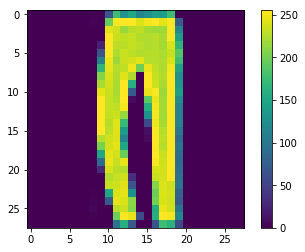

In [0]:
"""Preprocess the data..."""

# Inspect a image in trainging set
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

# Scale these values by dividing them by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
"""(3) Setup necessary layers..."""

batch_size = 128
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2,2)
# convolution kernel size
kernel_size = (3,3)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape=train_images_M.shape[1:]))
model.add(tf.keras.layers.Conv2D(nb_filters,kernel_size, padding='same', activation='relu'))

model.add(tf.keras.layers.BatchNormalization(input_shape=train_images_M.shape[1:]))
model.add(tf.keras.layers.Conv2D(2*nb_filters,kernel_size, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.BatchNormalization(input_shape=train_images_M.shape[1:]))
model.add(tf.keras.layers.Conv2D(3*nb_filters,kernel_size, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size, strides=pool_size))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('elu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(nb_classes))
model.add(tf.keras.layers.Activation('softmax'))

model.summary()

W0704 12:24:18.423729 140110382868352 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        2

In [0]:
"""(4) Compile the model..."""

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
"""(5) Train the model..."""

model.fit(train_images_M, train_labels, epochs=nb_epoch)

Epoch 1/10
60000/60000 [==============================] - 23s 384us/sample - loss: 0.5938 - acc: 0.7970
Epoch 2/10
60000/60000 [==============================] - 22s 366us/sample - loss: 0.3286 - acc: 0.8813
Epoch 3/10
60000/60000 [==============================] - 22s 366us/sample - loss: 0.2843 - acc: 0.8982
Epoch 4/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.2618 - acc: 0.9056
Epoch 5/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.2460 - acc: 0.9104
Epoch 6/10
60000/60000 [==============================] - 22s 365us/sample - loss: 0.2334 - acc: 0.9153
Epoch 7/10
60000/60000 [==============================] - 22s 363us/sample - loss: 0.2206 - acc: 0.9192
Epoch 8/10
60000/60000 [==============================] - 22s 366us/sample - loss: 0.2127 - acc: 0.9228
Epoch 9/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.1999 - acc: 0.9273
Epoch 10/10
60000/60000 [==============================] - 22s 3

In [0]:
"""(6) Evaluate the performance..."""

test_loss, test_acc = model.evaluate(test_images_M, test_labels)# compare how the model performs on the test dataset
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 164us/sample - loss: 0.2171 - acc: 0.9264
Test accuracy: 0.9264


a= [5058 2768 4768 4276 6954 1162 2432 4260 4428 9921]


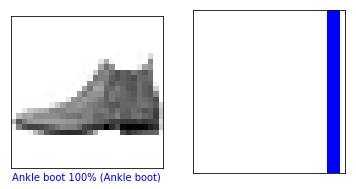

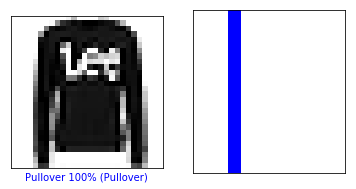

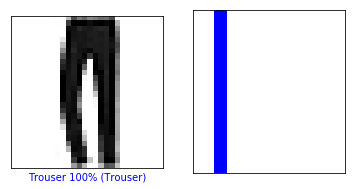

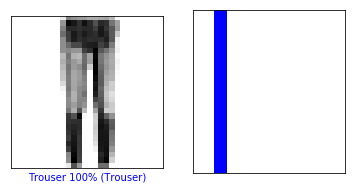

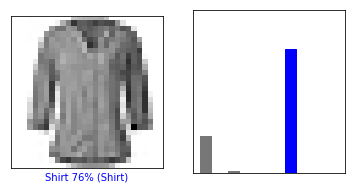

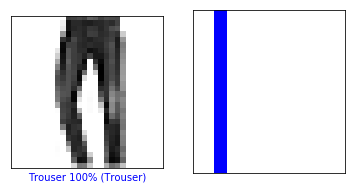

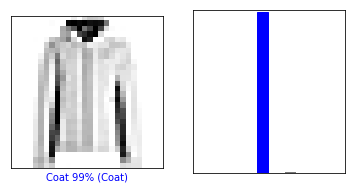

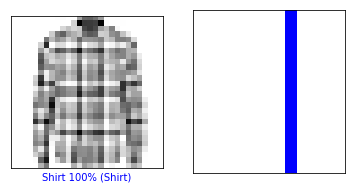

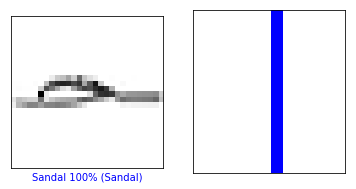

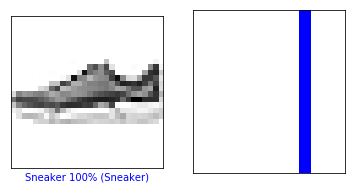

In [0]:
"""Make prediction..."""

predictions = model.predict(test_images_M) # Use the trained model to make predictions about some images

# Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  
# Plot 10 randomly selected testing images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
a = np.random.randint(0, len(test_labels), 10)
print('a=',a) 
for i in range(0,10):
  b = a[i]
  plt.figure(figsize=(6, 3))
  plt.subplot(1, 2, 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1, 2, 2)
  plot_value_array(i, predictions, test_labels)
plt.show()

x的大小为: (60000, 28, 28) 
 y的大小为： (10000, 28, 28)
x的大小为: (60000, 784) 
 y的大小为： (10000, 784)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


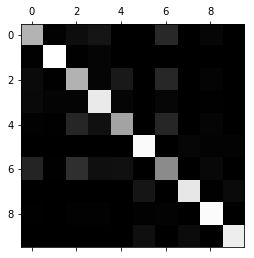

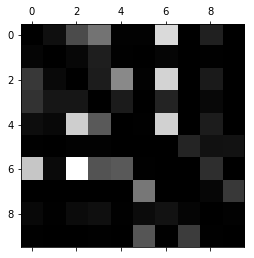

In [0]:
"""(7)Apply error analysis..."""

print('x的大小为:', train_images.shape, '\n','y的大小为：', test_images.shape)
train_images_RE = train_images.reshape([60000,784])
test_images_RE = test_images.reshape([10000,784])
print('x的大小为:', train_images_RE.shape, '\n','y的大小为：', test_images_RE.shape)

train_labels_Sandal = (train_labels == 'Sandal')

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(train_images_RE, train_labels)

from sklearn.model_selection import cross_val_predict
train_label_pred = cross_val_predict(sgd_clf, train_images_RE, train_labels, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(train_labels, train_label_pred)

def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()